<a href="https://colab.research.google.com/github/PRERAN001/Google_collab_files_-project_files-/blob/main/Linear_Regression_model_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np

class LinearRegression():
    def __init__(self, no_of_iterations, learning_rate):
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate

    def fit(self, x, y):
        self.m, self.n = x.shape  # m = number of data points, n = number of features
        self.w = np.zeros(self.n)
        self.b = 0
        self.x = x
        self.y = y

        for i in range(self.no_of_iterations):
            self.update()

    def update(self):
        y_prediction = self.predict(self.x)
        dw = -2 * (self.x.T.dot(self.y - y_prediction)) / self.m
        db = -2 * np.sum(self.y - y_prediction) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, x):
        return x.dot(self.w) + self.b


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("/content/salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
x=data.drop(columns="Salary",axis=1)
y=data["Salary"]

In [ ]:
x

In [ ]:
y

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
model=LinearRegression(no_of_iterations=10000,learning_rate=0.02)
x_train

,YearsExperience
20,6.8
5,2.9
27,9.6
12,4.0
4,2.2
10,3.9
16,5.1
28,10.3
25,9.0
17,5.3


In [43]:
model.fit(x_train,y_train)

In [44]:
print("weight",model.w)
print("bias",model.b)

weight YearsExperience    9532.835536
dtype: float64
bias 23750.93556359476


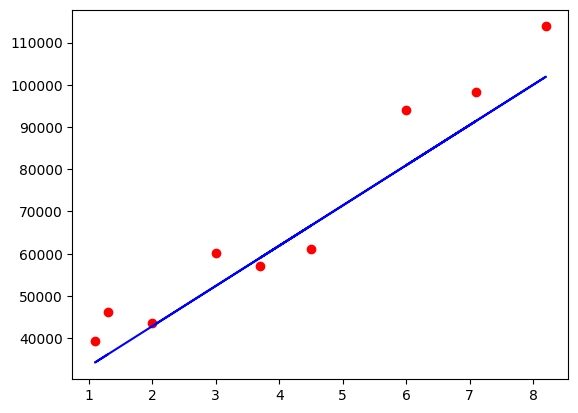

In [45]:
from sklearn.metrics import accuracy_score
prediction=model.predict(x_test)
prediction
plt.scatter(x_test, y_test, color="red")
plt.plot(x_test,prediction,color="blue")